# (shallow) Neural Network with TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
y_train = np.expand_dims(y_train, axis=1) 
y_test = np.expand_dims(y_test, axis=1) 

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000, 1)
(10000, 28, 28) (10000, 1)


## Select two numbers

In [5]:
number1, number2 = (0,1)

In [6]:
train_indeces_n1n2 = list( map( lambda x: True if x==number1 or x== number2 else False, y_train ) )
y_train = y_train[ train_indeces_n1n2,: ]
x_train = x_train[ train_indeces_n1n2,:,: ]
print(x_train.shape, y_train.shape)

(12665, 28, 28) (12665, 1)


In [7]:
test_indeces_n1n2 = list( map( lambda x: True if x==number1 or x== number2 else False, y_test ) )
y_test = y_test[ test_indeces_n1n2, : ]
x_test = x_test[ test_indeces_n1n2, :, : ]
print(x_test.shape, y_test.shape)

(2115, 28, 28) (2115, 1)


## Play with the data

In [8]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (12665, 28, 28) (12665, 1)
Test data:  (2115, 28, 28) (2115, 1)


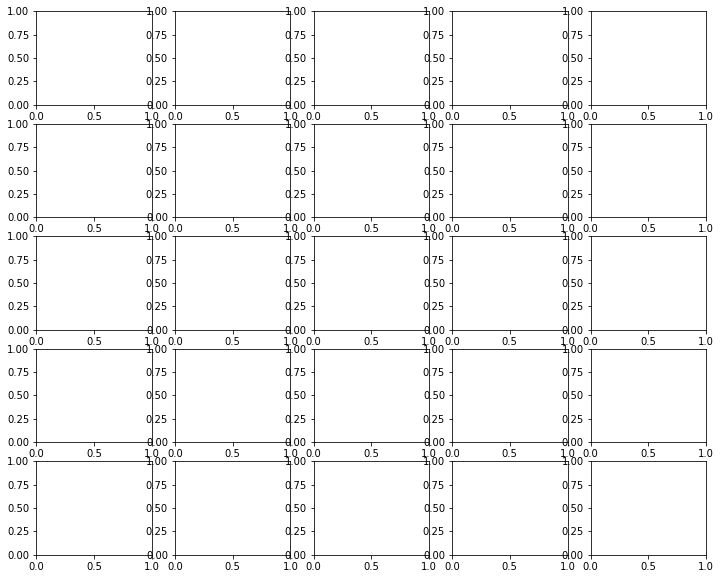

In [9]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [10]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [11]:
index = 0;
for i in range(5):
    for j in range(5):

        ax1[i, j].imshow(x_train[index], cmap='gray')
        ax1[i, j].set_title(r''.format(y_train[index]), fontsize=8)
        index += 1

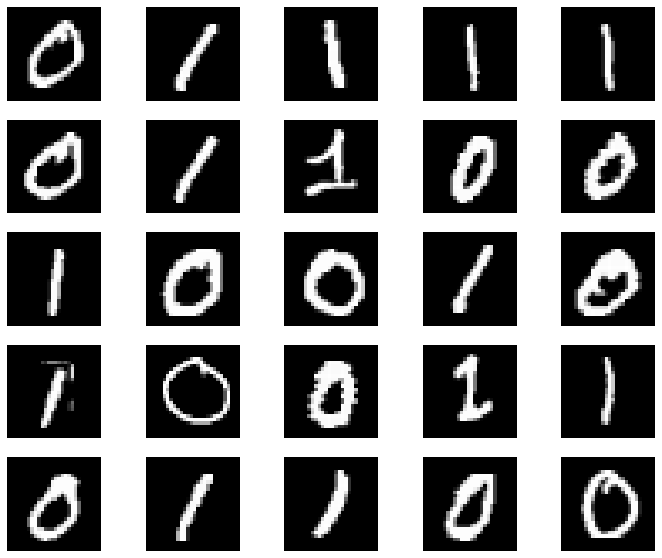

In [12]:
fig1

## Prepare the data

In [13]:
x_train, x_test = x_train/255.0, x_test / 255.0

## Build the model

In [14]:
model = tf.keras.models.Sequential()

In [15]:
model.add( tf.keras.layers.Flatten( input_shape=x_train[0].shape) )
model.add( tf.keras.layers.Dense( 128, activation='tanh') )
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [17]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
396/396 [==============================] - 5s 4ms/step - loss: 0.0723 - accuracy: 0.9939 - val_loss: 0.0173 - val_accuracy: 0.9995
Epoch 2/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0172 - accuracy: 0.9972 - val_loss: 0.0096 - val_accuracy: 0.9995
Epoch 3/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 0.9975 - val_loss: 0.0070 - val_accuracy: 0.9995
Epoch 4/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0056 - val_accuracy: 0.9995
Epoch 5/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 6/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 0.9995
Epoch 7/10
396/396 [==============================] - 1s 4ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 

## Evaluate the model

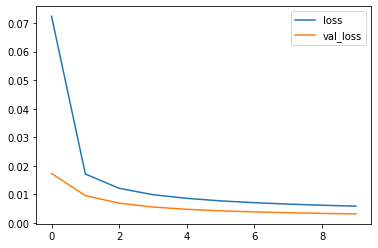

In [18]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

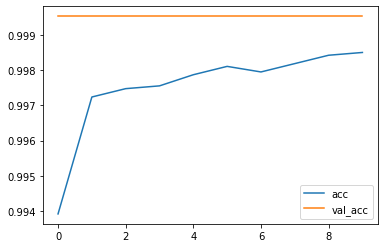

In [19]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

## Make predictions

In [20]:
y_test_hat= np.around(model.predict(x_test))

In [21]:
cm = confusion_matrix(y_test, y_test_hat)

In [22]:
cm

array([[ 979,    1],
       [   0, 1135]])

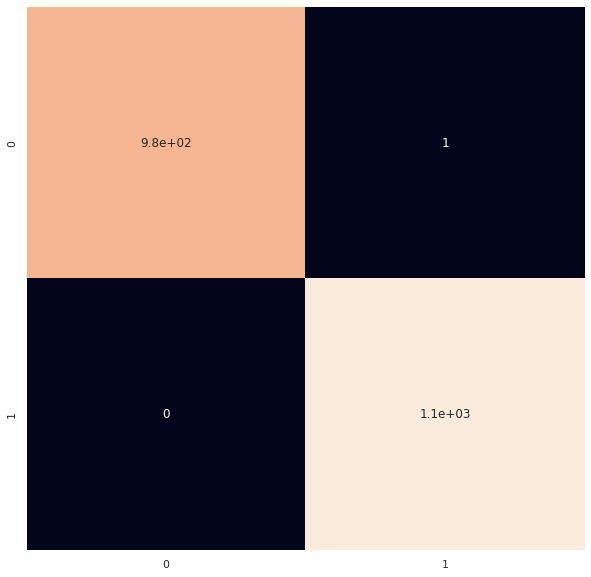

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm,annot=True,cbar=False)